In [15]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
filepath = "~/DSI-course-materials/curriculum/04-lessons/week-07/2.3-lab/assets/datasets/Airport_operations.csv"
raw_data = pd.read_csv(filepath)

In [44]:
raw_data.info()
raw_data.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 15 columns):
airport                               841 non-null object
year                                  841 non-null int64
departures for metric computation     841 non-null int64
arrivals for metric computation       841 non-null int64
percent on-time gate departures       841 non-null float64
percent on-time airport departures    841 non-null float64
percent on-time gate arrivals         841 non-null float64
average_gate_departure_delay          841 non-null float64
average_taxi_out_time                 841 non-null float64
average taxi out delay                841 non-null float64
average airport departure delay       841 non-null float64
average airborne delay                841 non-null float64
average taxi in delay                 841 non-null float64
average block delay                   841 non-null float64
average gate arrival delay            841 non-null float64
dtypes: float64(1

airport                               False
year                                  False
departures for metric computation     False
arrivals for metric computation       False
percent on-time gate departures       False
percent on-time airport departures    False
percent on-time gate arrivals         False
average_gate_departure_delay          False
average_taxi_out_time                 False
average taxi out delay                False
average airport departure delay       False
average airborne delay                False
average taxi in delay                 False
average block delay                   False
average gate arrival delay            False
dtype: bool

In [10]:
data = raw_data.drop(labels = "airport", axis = 1)

X = preprocessing.StandardScaler().fit_transform(data)
y = raw_data["airport"]

In [47]:
# y.value_counts()
y.unique()

array(['ABQ', 'ANC', 'ATL', 'AUS', 'BDL', 'BHM', 'BNA', 'BOS', 'BUF',
       'BUR', 'BWI', 'CLE', 'CLT', 'CVG', 'DAL', 'DAY', 'DCA', 'DEN',
       'DFW', 'DTW', 'EWR', 'FLL', 'GYY', 'HNL', 'HOU', 'HPN', 'IAD',
       'IAH', 'IND', 'ISP', 'JAX', 'JFK', 'LAS', 'LAX', 'LGA', 'LGB',
       'MCI', 'MCO', 'MDW', 'MEM', 'MHT', 'MIA', 'MKE', 'MSP', 'MSY',
       'OAK', 'OGG', 'OMA', 'ONT', 'ORD', 'OXR', 'PBI', 'PDX', 'PHL',
       'PHX', 'PIT', 'PSP', 'PVD', 'RDU', 'RFD', 'RSW', 'SAN', 'SAT',
       'SDF', 'SEA', 'SFO', 'SJC', 'SJU', 'SLC', 'SMF', 'SNA', 'STL',
       'SWF', 'TEB', 'TPA', 'TUS', 'VNY'], dtype=object)

In [120]:
covariance_matrix = np.cov(X.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

dataframe = pd.DataFrame(eigenvalues)
dataframe = pd.concat(objs = [dataframe.T, pd.DataFrame([eigenvectors[index] for index in range(len(eigenvectors))])])
dataframe.reset_index(drop = True, inplace = True)
eigenvector_features = dataframe.iloc[1:,0:6]
for column in eigenvector_features.columns:
    data.apply(eigenvector_features.loc[:, column], axis = 1)

TypeError: ("'Series' object is not callable", 'occurred at index 0')

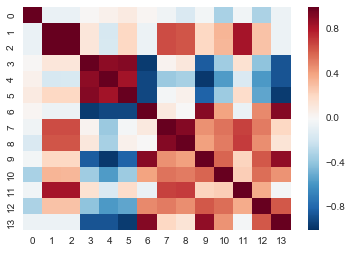

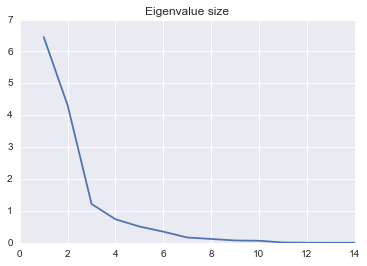

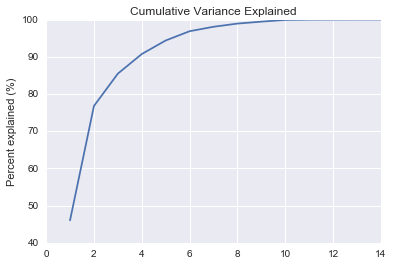

In [84]:
sns.heatmap(covariance_matrix)
sns.plt.show()

sns.plt.plot(np.arange(1,15), eigenvalues)
plt.title("Eigenvalue size")
sns.plt.show()

tot = sum(eigenvalues)
var_exp = [(i / tot)*100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
sns.plt.plot(np.arange(1,15), cum_var_exp)
plt.title("Cumulative Variance Explained")
plt.ylabel("Percent explained (%)")
sns.plt.show()